<a href="https://colab.research.google.com/github/oniprograma/Pandas/blob/main/6_formas_de_imputar_tus_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import random


# Generando dataset

In [ ]:
from faker import Faker
ourFake = Faker()

In [ ]:
nombres = [ourFake.unique.name() for b in range(10)]
nombres

['Brenda Walsh',
 'Thomas Stewart',
 'Valerie Vazquez',
 'Katherine Carroll',
 'Tony Herring',
 'Dean Gibbs',
 'Sarah Nelson',
 'Sherri Smith',
 'Sherry Holmes',
 'Leslie James']

**Dataframe Ficticio**

In [ ]:
data_dict = [ourFake.profile() for i in range(100)]
data = pd.DataFrame(data_dict)
data.columns,data.shape

(Index(['job', 'company', 'ssn', 'residence', 'current_location', 'blood_group',
        'website', 'username', 'name', 'sex', 'address', 'mail', 'birthdate'],
       dtype='object'), (100, 13))

In [ ]:
data['Edad'] = [np.random.randint(20,80) for i in range(len(data))]

In [ ]:
data.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Wellsite geologist,"Garrett, Oliver and Peterson",036-60-6262,"6041 Simmons River\nDixonborough, IN 08618","(-13.924009, 116.602583)",AB-,"[https://snyder-townsend.com/, http://castro-s...",campbellshawn,Anna Ruiz,F,"4435 Parrish Isle\nWest Stevenfurt, NM 67599",owerner@hotmail.com,1990-03-08,37
1,"Surveyor, rural practice","Wolf, Hutchinson and Johnson",840-12-0318,"0733 Fleming Fork\nHughestown, KS 63311","(62.0653045, -76.037746)",B+,"[http://moreno.com/, https://baker.biz/, https...",gilbertvanessa,Jeffrey Logan,M,"79100 Todd Corner\nNorth Jonathanmouth, FL 13923",meyerangela@gmail.com,1995-11-15,18
2,"Investment banker, corporate",Clements and Sons,228-88-4523,"6896 Jimenez Mount\nPort Nicole, AL 25718","(-76.997752, 139.153145)",A-,"[https://www.elliott.com/, https://floyd-howar...",christopherpierce,Elizabeth Berg,F,"85584 Hall Hill Apt. 632\nCarolynburgh, HI 10305",rogersmichael@yahoo.com,1953-05-31,42
3,Data processing manager,"Carter, Brown and Wilkins",587-43-1137,"994 Kristen Station Suite 358\nBakerberg, AL 2...","(40.614188, -45.163878)",B-,"[https://www.shepherd-perez.com/, https://coop...",nicholasbriggs,Mrs. Emily Petersen MD,F,"90174 Ortega Shoals\nJonathanborough, MN 75951",tracy95@hotmail.com,1965-03-08,12
4,Jewellery designer,Lopez Ltd,868-20-1623,31424 Pacheco Drive Suite 695\nSouth Jaredshir...,"(-87.791933, 114.350923)",AB+,[http://www.gordon.com/],savagedustin,Carrie Roberson,F,"33416 Best Cliffs\nRebeccaview, MO 78087",davidtorres@yahoo.com,1986-04-07,13


In [ ]:
data.dtypes

job                 object
company             object
ssn                 object
residence           object
current_location    object
blood_group         object
website             object
username            object
name                object
sex                 object
address             object
mail                object
birthdate           object
Edad                 int64
dtype: object

# Revisando valores vacios

In [ ]:
data.isna().sum()

job                 0
company             0
ssn                 0
residence           0
current_location    0
blood_group         0
website             0
username            0
name                0
sex                 0
address             0
mail                0
birthdate           0
Edad                0
dtype: int64

# Agregando vacios y nans

In [ ]:
index = [np.random.randint(0,100) for i in range(10)]
print(index)
for i in index:
  data.loc[i,['job']] = ""
  data.loc[i+1,['Edad']] = np.nan

[49, 18, 36, 20, 43, 84, 35, 73, 13, 4]


In [ ]:
data.head(10)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Broadcast presenter,"Osborn, Solomon and Barrera",003-31-9241,"885 Lori Gardens Suite 701\nSouth Ivanstad, WY...","(55.7142985, 48.987529)",O-,"[http://walker.com/, https://www.lewis.org/, h...",hannah87,Beverly Smith,F,"5261 Daniel Ville Apt. 051\nNorth Kelly, MO 59527",qgaines@yahoo.com,1947-09-04,34.0
1,Publishing copy,Hall-Moore,482-93-4093,"654 Smith Mission\nSouth Michael, KS 16956","(-81.4433885, 16.475459)",A+,[http://www.bennett.org/],whitejesus,William Newton Jr.,M,"638 Smith Common Suite 163\nEast Jasminefort, ...",stoutdebra@gmail.com,1950-09-20,58.0
2,NaN,Contreras LLC,217-83-2778,"70237 Jessica Radial Apt. 838\nYoungport, MH 0...","(-63.4144455, -108.316167)",AB-,"[https://yoder.com/, https://www.hoffman-escob...",anthony60,Rebecca Kramer,F,"617 Tami Skyway\nDavidberg, NC 47387",bryan49@gmail.com,2019-10-10,54.0
3,Psychotherapist,Lee-Rowe,430-17-2954,"751 Wu Trail Apt. 441\nLake Robert, AS 44684","(-41.4553845, -48.983690)",AB-,"[https://carter.com/, http://hall.org/, http:/...",julielarsen,Lisa Nelson,F,"PSC 6669, Box 0310\nAPO AE 51463",nknight@gmail.com,1927-01-28,35.0
4,,Young-Henry,887-99-1306,"PSC 5726, Box 3321\nAPO AA 72767","(75.8156645, 152.044069)",AB-,"[http://www.morgan-lewis.com/, https://www.jim...",armstronglonnie,Brooke Lester,F,"39119 Jeremiah Mews\nLesterton, PR 80507",vanessafarmer@gmail.com,1969-03-30,24.0
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,NaN
6,Consulting civil engineer,Melendez-Watson,619-31-3865,USCGC Maynard\nFPO AA 38463,"(-22.089494, 170.865202)",B+,[https://meyer-powell.com/],johnrogers,Jennifer Orr,F,"3872 Henry Points\nLake Kimberlyshire, KS 26888",catherine91@yahoo.com,1926-02-23,71.0
7,Politician's assistant,Brandt LLC,172-09-1651,"64148 Matthews Gardens\nPort David, WI 71515","(85.280613, 55.531212)",O-,"[http://www.george.info/, https://cline.com/]",danielmorris,Alyssa Jimenez,F,USNS Chang\nFPO AE 98417,erika61@hotmail.com,1923-05-18,30.0
8,NaN,Weeks LLC,302-41-0340,"170 Roger Overpass Suite 970\nAndrewstown, CT ...","(-66.9475965, 27.899394)",AB-,[http://www.marquez.com/],andrewlam,Kari Edwards,F,"8336 Murphy Springs\nGonzalezstad, GU 48940",vsnow@hotmail.com,1924-08-04,70.0
9,"Administrator, education",Roberts Inc,506-04-9772,"0228 Kaiser Mountain\nJoannaside, PA 17309","(-28.6278615, 12.777384)",AB+,"[http://www.rich.com/, https://green-henry.com...",traci18,Natasha Moore,F,"8523 Wright Parkway\nMarcbury, OH 55911",abrown@hotmail.com,1998-08-28,62.0


In [ ]:
data.isna().sum()

job                 10
company              0
ssn                  0
residence            0
current_location     0
blood_group          0
website              0
username             0
name                 0
sex                  0
address              0
mail                 0
birthdate            0
Edad                10
dtype: int64

# Encontrando valores vacios

In [ ]:
np.where(data.applymap(lambda x: x == "")),len(np.where(data.applymap(lambda x: x == ""))[0])

((array([ 1,  2,  7,  8, 24, 28, 54, 55, 68, 84]),
  array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])),
 10)

In [ ]:
len(np.where(data.applymap(lambda x: x == ""))[0])

10

In [ ]:
data[data['job']==""]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
1,,"Wolf, Hutchinson and Johnson",840-12-0318,"0733 Fleming Fork\nHughestown, KS 63311","(62.0653045, -76.037746)",B+,"[http://moreno.com/, https://baker.biz/, https...",gilbertvanessa,Jeffrey Logan,M,"79100 Todd Corner\nNorth Jonathanmouth, FL 13923",meyerangela@gmail.com,1995-11-15,18.0
2,,Clements and Sons,228-88-4523,"6896 Jimenez Mount\nPort Nicole, AL 25718","(-76.997752, 139.153145)",A-,"[https://www.elliott.com/, https://floyd-howar...",christopherpierce,Elizabeth Berg,F,"85584 Hall Hill Apt. 632\nCarolynburgh, HI 10305",rogersmichael@yahoo.com,1953-05-31,NaN
7,,Smith PLC,494-27-2642,"295 Samuel Turnpike Apt. 186\nNorth Bradhaven,...","(32.6453825, -55.328754)",A+,"[http://www.duncan.com/, http://vincent.com/]",johnsonjesse,William Kelly,M,"2778 Benson Shores Suite 847\nEast Benjamin, G...",samanthacoleman@yahoo.com,1946-03-22,31.0
8,,"Estrada, Morrison and Johnson",707-89-5109,"86111 Pace Rest Apt. 949\nMoorefurt, NJ 15251","(-83.4566185, 37.092907)",AB+,"[https://nguyen.com/, https://frye.com/]",ssullivan,Michael Brooks,M,"13431 Edwards Road\nNew Sarahfurt, ND 12962",riverajamie@hotmail.com,1996-07-06,NaN
24,,"Good, Singh and Ware",836-44-4863,"3277 Ashley Circle\nSouth Dale, OR 98414","(1.631455, -14.291888)",B-,"[http://hughes-lambert.biz/, https://www.harri...",williamsgloria,Tina Ellis,F,"9171 Steven Lock\nWaltersbury, NH 03735",dpayne@yahoo.com,1992-04-14,23.0
28,,Thompson-Ward,081-40-7191,"7708 Allen Rue Suite 335\nSouth Kevinton, NV 7...","(70.478286, 102.680769)",AB-,"[https://www.miller.com/, http://rodriguez-mic...",goodwinmark,Mr. Luis Mckinney,M,"25628 Daniel Court\nHillland, DC 47493",tracyhoward@gmail.com,1939-06-23,24.0
54,,Smith-Miller,731-64-3418,"2825 Craig Loop Apt. 381\nWest Jessicamouth, S...","(-28.5235815, 25.816403)",A+,"[http://www.martinez.com/, https://www.tanner-...",mcdonaldmike,Luis Kemp,M,"9766 Pamela River\nSouth Linda, MD 75843",mcarter@yahoo.com,1936-02-13,28.0
55,,George-Mahoney,043-80-4113,"1353 Susan Burg\nNew Kelly, TN 78213","(12.2810975, -130.705182)",B+,"[http://www.weeks-oneal.info/, https://www.fro...",xtaylor,Thomas Harris,M,"117 Tina Streets Suite 865\nKempstad, TX 82128",bradley52@hotmail.com,1907-09-24,NaN
68,,"Smith, Singh and Foster",267-36-7292,"233 Acosta Ports\nJuanmouth, AK 72565","(35.705706, 1.276097)",B+,"[https://clark-roy.com/, http://bailey.com/]",dawsonmonica,David Parker,M,"444 Mathis Manor\nMarcushaven, NV 62426",rwilson@gmail.com,1963-08-07,21.0
84,,"Evans, Acosta and Chapman",894-52-7116,"97183 Moore Common Apt. 557\nLake Samuel, GA 2...","(-25.173744, 21.554251)",O+,"[https://www.hoover.com/, https://gould.com/, ...",pricejeremy,Douglas Gray,M,"57913 Horton Village Apt. 994\nSouth Dawn, MO ...",jeffrey44@hotmail.com,1958-05-16,40.0


# Encontando NaNs

In [ ]:
np.where(pd.isna(data)) 

(array([ 5, 19, 23, 25, 31, 35, 45, 48, 88, 97]),
 array([13, 13, 13, 13, 13, 13, 13, 13, 13, 13]))

In [ ]:
data.isna().sum()

job                  0
company              0
ssn                  0
residence            0
current_location     0
blood_group          0
website              0
username             0
name                 0
sex                  0
address              0
mail                 0
birthdate            0
Edad                10
dtype: int64

In [ ]:
data[data.isna().any(axis=1)]  

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,"Surveyor, hydrographic",Ellis Inc,856-35-9398,589 Garcia Junctions Suite 396\nLake Walterfur...,"(-36.665349, 40.049138)",AB-,"[http://smith.com/, http://www.martinez.org/, ...",joshua78,Paige Blevins,F,"52813 Theodore Dam\nPort Amy, LA 96651",millerhector@yahoo.com,1943-06-15,NaN
19,Careers adviser,Johnson-Blevins,716-11-1219,"19474 Charles Ferry\nAaronbury, VA 27207","(-6.2019595, -39.631249)",B-,"[http://white-butler.com/, http://roth.com/]",kmontgomery,Andrew Colon,M,"9057 Quinn Trail Apt. 674\nSouth Timothy, IA 9...",john21@gmail.com,1955-10-28,NaN
23,Marketing executive,Jimenez Group,482-33-8051,"528 Barbara Viaduct Suite 278\nWest Lorihaven,...","(73.3759585, 117.604747)",B-,"[http://harris.org/, http://day-armstrong.info...",elizabeth44,John Smith,M,"2240 Louis Mission Suite 731\nNew Michelle, AK...",jacoblong@gmail.com,1958-09-12,NaN
25,Energy engineer,Abbott Group,693-73-2149,"PSC 6495, Box 4469\nAPO AE 34142","(-11.4172475, 139.629289)",A-,[http://www.buck.org/],edwardchristensen,Aaron Johnston,M,"2653 James Club\nEdwardsport, MN 13158",charlesrobinson@hotmail.com,1941-05-20,NaN
31,Operational investment banker,Mccall Group,542-50-4903,"04176 Samuel Locks\nGrayville, PA 65715","(-64.0597045, -159.582810)",AB+,[https://spence.com/],anthonylynch,Amanda Wang PhD,F,"98931 Michael Shores Apt. 379\nWest Scottberg,...",powelljanet@gmail.com,1959-08-02,NaN
35,Ergonomist,Noble-Jones,151-06-8818,"02925 Jeff Flats Suite 345\nClarkmouth, LA 29763","(-86.7130785, -4.433824)",AB+,[https://smith.com/],orocha,Alexis Allen,F,"0627 Barber Ports\nNorth Erika, PW 16730",alexander25@gmail.com,1947-12-02,NaN
45,Media planner,Smith-Snyder,461-64-9250,"85748 Nicole Centers\nGarychester, WI 79160","(-7.023544, 105.528413)",B-,"[https://www.anderson.com/, https://www.dixon....",owenmichael,Timothy Reynolds,M,16508 Ernest Parks Suite 315\nPort Virginiashi...,patrickward@gmail.com,1951-10-25,NaN
48,Pharmacologist,Knight-Fernandez,698-92-7538,"73180 Brennan Meadow\nRichborough, KS 81601","(13.7624775, 105.943049)",O-,"[http://www.perry.com/, https://robinson.com/]",walterfoster,Scott Green,M,"0755 Alexis Place Suite 622\nPort Pamela, CA 4...",sara54@yahoo.com,1926-12-16,NaN
88,Accommodation manager,"Mcbride, George and Sanders",090-71-8110,Unit 4321 Box 5953\nDPO AE 27298,"(-4.0791135, -12.746021)",AB+,[https://buck.info/],patrickmichael,Alexander Mendez,M,"689 Morrison Square\nEast Vincent, VA 72649",santiagojennifer@yahoo.com,1913-10-07,NaN
97,Company secretary,Hernandez and Sons,126-41-5092,"977 John Lake Apt. 468\nAngelstad, MH 57804","(-88.403729, 89.896941)",A+,"[https://anderson.com/, http://riley.com/, htt...",geraldrodriguez,Chelsea Wilson,F,USNV Phillips\nFPO AP 67711,jeffreykirk@yahoo.com,1933-02-13,NaN


# Cambiando vacios a NaNs

In [ ]:
data.replace("", np.nan).head(10)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Broadcast presenter,"Osborn, Solomon and Barrera",003-31-9241,"885 Lori Gardens Suite 701\nSouth Ivanstad, WY...","(55.7142985, 48.987529)",O-,"[http://walker.com/, https://www.lewis.org/, h...",hannah87,Beverly Smith,F,"5261 Daniel Ville Apt. 051\nNorth Kelly, MO 59527",qgaines@yahoo.com,1947-09-04,34.0
1,Publishing copy,Hall-Moore,482-93-4093,"654 Smith Mission\nSouth Michael, KS 16956","(-81.4433885, 16.475459)",A+,[http://www.bennett.org/],whitejesus,William Newton Jr.,M,"638 Smith Common Suite 163\nEast Jasminefort, ...",stoutdebra@gmail.com,1950-09-20,58.0
2,NaN,Contreras LLC,217-83-2778,"70237 Jessica Radial Apt. 838\nYoungport, MH 0...","(-63.4144455, -108.316167)",AB-,"[https://yoder.com/, https://www.hoffman-escob...",anthony60,Rebecca Kramer,F,"617 Tami Skyway\nDavidberg, NC 47387",bryan49@gmail.com,2019-10-10,54.0
3,Psychotherapist,Lee-Rowe,430-17-2954,"751 Wu Trail Apt. 441\nLake Robert, AS 44684","(-41.4553845, -48.983690)",AB-,"[https://carter.com/, http://hall.org/, http:/...",julielarsen,Lisa Nelson,F,"PSC 6669, Box 0310\nAPO AE 51463",nknight@gmail.com,1927-01-28,35.0
4,NaN,Young-Henry,887-99-1306,"PSC 5726, Box 3321\nAPO AA 72767","(75.8156645, 152.044069)",AB-,"[http://www.morgan-lewis.com/, https://www.jim...",armstronglonnie,Brooke Lester,F,"39119 Jeremiah Mews\nLesterton, PR 80507",vanessafarmer@gmail.com,1969-03-30,24.0
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,NaN
6,Consulting civil engineer,Melendez-Watson,619-31-3865,USCGC Maynard\nFPO AA 38463,"(-22.089494, 170.865202)",B+,[https://meyer-powell.com/],johnrogers,Jennifer Orr,F,"3872 Henry Points\nLake Kimberlyshire, KS 26888",catherine91@yahoo.com,1926-02-23,71.0
7,Politician's assistant,Brandt LLC,172-09-1651,"64148 Matthews Gardens\nPort David, WI 71515","(85.280613, 55.531212)",O-,"[http://www.george.info/, https://cline.com/]",danielmorris,Alyssa Jimenez,F,USNS Chang\nFPO AE 98417,erika61@hotmail.com,1923-05-18,30.0
8,NaN,Weeks LLC,302-41-0340,"170 Roger Overpass Suite 970\nAndrewstown, CT ...","(-66.9475965, 27.899394)",AB-,[http://www.marquez.com/],andrewlam,Kari Edwards,F,"8336 Murphy Springs\nGonzalezstad, GU 48940",vsnow@hotmail.com,1924-08-04,70.0
9,"Administrator, education",Roberts Inc,506-04-9772,"0228 Kaiser Mountain\nJoannaside, PA 17309","(-28.6278615, 12.777384)",AB+,"[http://www.rich.com/, https://green-henry.com...",traci18,Natasha Moore,F,"8523 Wright Parkway\nMarcbury, OH 55911",abrown@hotmail.com,1998-08-28,62.0


In [ ]:
data = data.replace("", np.nan) 

In [ ]:
data[data.isna().any(axis=1)]  

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
2,NaN,Contreras LLC,217-83-2778,"70237 Jessica Radial Apt. 838\nYoungport, MH 0...","(-63.4144455, -108.316167)",AB-,"[https://yoder.com/, https://www.hoffman-escob...",anthony60,Rebecca Kramer,F,"617 Tami Skyway\nDavidberg, NC 47387",bryan49@gmail.com,2019-10-10,54.0
4,NaN,Young-Henry,887-99-1306,"PSC 5726, Box 3321\nAPO AA 72767","(75.8156645, 152.044069)",AB-,"[http://www.morgan-lewis.com/, https://www.jim...",armstronglonnie,Brooke Lester,F,"39119 Jeremiah Mews\nLesterton, PR 80507",vanessafarmer@gmail.com,1969-03-30,24.0
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,NaN
8,NaN,Weeks LLC,302-41-0340,"170 Roger Overpass Suite 970\nAndrewstown, CT ...","(-66.9475965, 27.899394)",AB-,[http://www.marquez.com/],andrewlam,Kari Edwards,F,"8336 Murphy Springs\nGonzalezstad, GU 48940",vsnow@hotmail.com,1924-08-04,70.0
13,NaN,Christian PLC,682-58-0215,"429 Cole Street Suite 553\nBurtonton, OR 17462","(23.091241, 157.352997)",O-,"[https://www.grimes.com/, http://barber-torres...",ksnyder,Timothy Webb,M,"184 James Wall Apt. 333\nRichardport, GU 37314",sbowers@yahoo.com,1992-09-01,20.0
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,NaN
18,NaN,"Burns, Woodward and Lucas",898-84-3967,7599 Fitzgerald Throughway Apt. 322\nEast Will...,"(59.172073, -83.493238)",A-,"[http://hill-perez.net/, http://www.leon.org/]",samuel63,Diane Spencer,F,08025 Hughes Loop Apt. 543\nEast Gregorycheste...,andrewgarcia@yahoo.com,1907-09-16,26.0
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,NaN
20,NaN,"Russell, Kim and King",771-41-6174,USCGC Jones\nFPO AP 14332,"(32.182659, 111.899256)",O+,"[http://parker.info/, http://campbell.com/, ht...",hoopertroy,Richard Gibson,M,"3028 Eric Union Suite 658\nNew Kimberly, NM 81486",vincent79@hotmail.com,1988-08-25,40.0
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,NaN


# 1-Borrando datos

In [ ]:
#Borra las filas que no tienen datos axis=0, borra las columnas que no tienen datos con axis = 1
leandata = data.dropna(axis=0)
leandata.isna().sum()

job                 0
company             0
ssn                 0
residence           0
current_location    0
blood_group         0
website             0
username            0
name                0
sex                 0
address             0
mail                0
birthdate           0
Edad                0
dtype: int64

In [ ]:
print(leandata.shape,data.shape)

(80, 14) (100, 14)


**Borra columna**

In [ ]:
data.drop(['name'],axis=1)

,job,company,ssn,residence,current_location,blood_group,website,username,sex,address,mail,birthdate,Edad
0,IT consultant,"Moore, Smith and Arroyo",774-54-6034,"PSC 2795, Box 1345\nAPO AA 79383","(79.3726835, 131.148277)",B-,"[https://www.moss.com/, http://sheppard-crawfo...",andersonsarah,M,"19990 Elizabeth Coves\nPort Morgan, MP 44391",longlawrence@yahoo.com,1963-10-10,15.0
1,Mining engineer,Chapman Inc,571-02-4458,"06967 Dana Courts\nLake Katelyn, ID 89836","(-17.4849095, 179.649942)",O-,"[http://www.davidson.com/, https://rush.info/]",alexandria02,M,"2028 Leslie Locks\nNancymouth, TX 97768",beth98@yahoo.com,2017-10-01,18.0
2,Clinical psychologist,"Johnson, Edwards and Boyd",794-19-7863,"63408 Jackson Summit\nAndreatown, DC 30374","(71.3323615, 162.622341)",AB-,"[https://www.watts.com/, https://johnson-west....",yruiz,M,"PSC 3812, Box 2033\nAPO AE 80636",fmartin@gmail.com,1960-11-23,0.0
3,"Surveyor, rural practice",Jones-Wallace,270-44-5428,"04581 Miranda Ports\nFernandezton, WA 36850","(-87.2222025, -23.947802)",B+,"[http://www.bowman.com/, http://ramsey-wilson....",valerie36,F,"5739 Watkins Drives\nNorth Melissaside, NY 20811",ismith@gmail.com,1969-10-30,7.0
4,NaN,Adams-Munoz,466-18-8074,"36449 James Keys Suite 909\nSouth Stephanie, M...","(-3.7240385, -156.370636)",A+,"[http://www.berry.com/, https://dudley.com/]",noblebrenda,F,Unit 0585 Box 4904\nDPO AE 77356,hernandezshane@hotmail.com,1962-10-05,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Engineer, technical sales",Harrison Group,384-69-5649,"233 Wilson Junction\nTamarabury, KS 74150","(-28.6514915, 144.311629)",A-,[http://bray.biz/],deanna77,F,"9570 Sampson Isle\nSouth Joyceville, AK 35848",jerryjones@gmail.com,1994-10-31,17.0
96,NaN,Maxwell-Williams,336-70-6802,"5398 Cruz Hollow\nPort Howard, OR 24227","(-23.9745015, -80.768402)",O+,"[http://www.lee.net/, https://fox-evans.com/]",wwhite,M,"401 Griffin Gateway\nSouth Micheleville, VI 27589",brian51@hotmail.com,1932-05-27,3.0
97,Company secretary,Hernandez and Sons,126-41-5092,"977 John Lake Apt. 468\nAngelstad, MH 57804","(-88.403729, 89.896941)",A+,"[https://anderson.com/, http://riley.com/, htt...",geraldrodriguez,F,USNV Phillips\nFPO AP 67711,jeffreykirk@yahoo.com,1933-02-13,NaN
98,Commissioning editor,Fischer-Morton,135-61-2170,"26802 Jessica Inlet\nMarktown, MP 41148","(48.3577765, -125.985585)",B+,"[https://www.wang-foster.org/, https://www.tur...",wgrant,M,USCGC Gilbert\nFPO AP 68829,dianemyers@gmail.com,2009-11-17,8.0


# 2-Reemplazo básico

**`Imputa valores con 0**

In [ ]:
data2 = data.copy()

In [ ]:
#una sola columna
data2['Edad'] = data2['Edad'].fillna(0)
data2.isna().sum()

job                 26
company              1
ssn                  1
residence            1
current_location     1
blood_group          1
website              1
username             1
name                 1
sex                  1
address              1
mail                 1
birthdate            1
Edad                 0
dtype: int64

In [ ]:
#todo el dataframe
data2 = data2.fillna(0)
data2.isna().sum()

job                 0
company             0
ssn                 0
residence           0
current_location    0
blood_group         0
website             0
username            0
name                0
sex                 0
address             0
mail                0
birthdate           0
Edad                0
dtype: int64

In [ ]:
data2.head(10)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Dispensing optician,Yang-Henderson,646-08-8938,"78116 Robin Street Apt. 454\nEast Adrian, AL 0...","(69.2807605, -106.978611)",A-,"[http://www.edwards.biz/, http://www.clark.com/]",lowetony,Todd Adkins,M,4070 Robbins Mission Suite 867\nPort Lisamouth...,stacy14@yahoo.com,1927-05-05,1.0
1,Magazine features editor,Brown-Martin,073-09-9095,"951 Fowler Club Apt. 023\nRogersmouth, KY 69145","(-74.0076575, -92.499463)",A+,[https://mcconnell.org/],zbrown,Stephanie Richards,F,"601 Duncan Burg Apt. 958\nLake Rebecca, MI 57037",adamsphilip@gmail.com,1933-02-09,40.0
2,Print production planner,Wall-Mccarthy,443-31-4513,USS Moore\nFPO AE 81651,"(31.1787895, 114.214961)",A-,[http://lucas.com/],stantonaaron,Laura Castro,F,"1398 Valerie Gardens Apt. 106\nEast Daniel, MO...",dmendoza@hotmail.com,1912-02-03,28.0
3,Minerals surveyor,"Benson, Shepard and Wright",425-44-8749,"872 Jamie Underpass Apt. 720\nBensonbury, NV 7...","(-22.8857855, 129.320580)",A-,"[http://tran.com/, http://harvey.biz/]",herrerathomas,Eric Wyatt,M,"73285 Craig Hills\nWest Lindaberg, KY 14308",deanna53@yahoo.com,1950-10-28,39.0
4,Applications developer,Jones LLC,234-10-4637,"8810 Juan Mountain\nBrowningfurt, MS 06558","(-48.1414465, -34.971051)",AB-,[http://brown.org/],michaelkaitlyn,Susan Madden,F,"19750 Amy Viaduct\nNew Derek, OR 25977",nleonard@yahoo.com,1931-02-12,4.0
5,Tour manager,Allen-Tate,175-10-2021,7784 Rodriguez Throughway Apt. 340\nGregorysid...,"(75.491017, 123.103687)",O-,"[http://www.gibson.com/, https://white.com/]",pmcintosh,Steven Leon,M,"99186 Jason Flat\nNorth Larryland, HI 14937",thomasscott@hotmail.com,1991-09-10,4.0
6,0,Martin Ltd,857-35-0791,"130 Sara Green\nJacquelineside, VT 53902","(31.463636, 132.702218)",B+,"[http://smith.com/, http://www.morrison.com/, ...",vbryant,Derek Turner,M,"22616 Michelle Roads Apt. 926\nPattersonland, ...",rachael66@gmail.com,1940-11-01,36.0
7,Aid worker,"Arnold, Gonzalez and Garrison",536-48-3022,"66314 Butler Via Suite 997\nGregorystad, WI 08255","(30.708245, -0.490370)",B+,"[https://nash.com/, https://www.barnett.com/, ...",mcase,Patricia Barnes,F,"6913 Huang Ranch Suite 748\nEast Miranda, AS 2...",sabrinacobb@hotmail.com,1958-06-16,0.0
8,Customer service manager,"Owen, Huff and Potter",446-55-5868,"8718 Bradford Pines Suite 787\nMurrayside, TX ...","(44.023583, 33.069156)",O-,"[https://www.hernandez-chapman.biz/, http://kr...",rossemily,Dr. Fred Rogers,M,2647 Billy Ferry Suite 366\nNorth Kristinestad...,kerrrachel@yahoo.com,1917-10-18,5.0
9,"Surveyor, land/geomatics",Carroll-Lyons,431-89-8812,"96660 Smith Creek Suite 237\nKathleenshire, WI...","(13.8170945, 69.378437)",O+,"[http://jones-reed.org/, https://barnes-cruz.c...",plivingston,Abigail Tucker,F,"5865 Gordon Fords\nEast Shanefurt, AS 38189",chambersanthony@hotmail.com,1986-01-16,32.0


In [ ]:
data.head(10)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Dispensing optician,Yang-Henderson,646-08-8938,"78116 Robin Street Apt. 454\nEast Adrian, AL 0...","(69.2807605, -106.978611)",A-,"[http://www.edwards.biz/, http://www.clark.com/]",lowetony,Todd Adkins,M,4070 Robbins Mission Suite 867\nPort Lisamouth...,stacy14@yahoo.com,1927-05-05,1.0
1,Magazine features editor,Brown-Martin,073-09-9095,"951 Fowler Club Apt. 023\nRogersmouth, KY 69145","(-74.0076575, -92.499463)",A+,[https://mcconnell.org/],zbrown,Stephanie Richards,F,"601 Duncan Burg Apt. 958\nLake Rebecca, MI 57037",adamsphilip@gmail.com,1933-02-09,40.0
2,Print production planner,Wall-Mccarthy,443-31-4513,USS Moore\nFPO AE 81651,"(31.1787895, 114.214961)",A-,[http://lucas.com/],stantonaaron,Laura Castro,F,"1398 Valerie Gardens Apt. 106\nEast Daniel, MO...",dmendoza@hotmail.com,1912-02-03,28.0
3,Minerals surveyor,"Benson, Shepard and Wright",425-44-8749,"872 Jamie Underpass Apt. 720\nBensonbury, NV 7...","(-22.8857855, 129.320580)",A-,"[http://tran.com/, http://harvey.biz/]",herrerathomas,Eric Wyatt,M,"73285 Craig Hills\nWest Lindaberg, KY 14308",deanna53@yahoo.com,1950-10-28,39.0
4,Applications developer,Jones LLC,234-10-4637,"8810 Juan Mountain\nBrowningfurt, MS 06558","(-48.1414465, -34.971051)",AB-,[http://brown.org/],michaelkaitlyn,Susan Madden,F,"19750 Amy Viaduct\nNew Derek, OR 25977",nleonard@yahoo.com,1931-02-12,4.0
5,Tour manager,Allen-Tate,175-10-2021,7784 Rodriguez Throughway Apt. 340\nGregorysid...,"(75.491017, 123.103687)",O-,"[http://www.gibson.com/, https://white.com/]",pmcintosh,Steven Leon,M,"99186 Jason Flat\nNorth Larryland, HI 14937",thomasscott@hotmail.com,1991-09-10,4.0
6,NaN,Martin Ltd,857-35-0791,"130 Sara Green\nJacquelineside, VT 53902","(31.463636, 132.702218)",B+,"[http://smith.com/, http://www.morrison.com/, ...",vbryant,Derek Turner,M,"22616 Michelle Roads Apt. 926\nPattersonland, ...",rachael66@gmail.com,1940-11-01,36.0
7,Aid worker,"Arnold, Gonzalez and Garrison",536-48-3022,"66314 Butler Via Suite 997\nGregorystad, WI 08255","(30.708245, -0.490370)",B+,"[https://nash.com/, https://www.barnett.com/, ...",mcase,Patricia Barnes,F,"6913 Huang Ranch Suite 748\nEast Miranda, AS 2...",sabrinacobb@hotmail.com,1958-06-16,NaN
8,Customer service manager,"Owen, Huff and Potter",446-55-5868,"8718 Bradford Pines Suite 787\nMurrayside, TX ...","(44.023583, 33.069156)",O-,"[https://www.hernandez-chapman.biz/, http://kr...",rossemily,Dr. Fred Rogers,M,2647 Billy Ferry Suite 366\nNorth Kristinestad...,kerrrachel@yahoo.com,1917-10-18,5.0
9,"Surveyor, land/geomatics",Carroll-Lyons,431-89-8812,"96660 Smith Creek Suite 237\nKathleenshire, WI...","(13.8170945, 69.378437)",O+,"[http://jones-reed.org/, https://barnes-cruz.c...",plivingston,Abigail Tucker,F,"5865 Gordon Fords\nEast Shanefurt, AS 38189",chambersanthony@hotmail.com,1986-01-16,32.0


**Imputando con el promedio**

In [ ]:
data2 = data.copy()
data2.head(10)

In [ ]:
data2['Edad'] = data2['Edad'].fillna(data2['Edad'].mean())
data2.head(10)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Dispensing optician,Yang-Henderson,646-08-8938,"78116 Robin Street Apt. 454\nEast Adrian, AL 0...","(69.2807605, -106.978611)",A-,"[http://www.edwards.biz/, http://www.clark.com/]",lowetony,Todd Adkins,M,4070 Robbins Mission Suite 867\nPort Lisamouth...,stacy14@yahoo.com,1927-05-05,1.000000
1,Magazine features editor,Brown-Martin,073-09-9095,"951 Fowler Club Apt. 023\nRogersmouth, KY 69145","(-74.0076575, -92.499463)",A+,[https://mcconnell.org/],zbrown,Stephanie Richards,F,"601 Duncan Burg Apt. 958\nLake Rebecca, MI 57037",adamsphilip@gmail.com,1933-02-09,40.000000
2,Print production planner,Wall-Mccarthy,443-31-4513,USS Moore\nFPO AE 81651,"(31.1787895, 114.214961)",A-,[http://lucas.com/],stantonaaron,Laura Castro,F,"1398 Valerie Gardens Apt. 106\nEast Daniel, MO...",dmendoza@hotmail.com,1912-02-03,28.000000
3,Minerals surveyor,"Benson, Shepard and Wright",425-44-8749,"872 Jamie Underpass Apt. 720\nBensonbury, NV 7...","(-22.8857855, 129.320580)",A-,"[http://tran.com/, http://harvey.biz/]",herrerathomas,Eric Wyatt,M,"73285 Craig Hills\nWest Lindaberg, KY 14308",deanna53@yahoo.com,1950-10-28,39.000000
4,Applications developer,Jones LLC,234-10-4637,"8810 Juan Mountain\nBrowningfurt, MS 06558","(-48.1414465, -34.971051)",AB-,[http://brown.org/],michaelkaitlyn,Susan Madden,F,"19750 Amy Viaduct\nNew Derek, OR 25977",nleonard@yahoo.com,1931-02-12,4.000000
5,Tour manager,Allen-Tate,175-10-2021,7784 Rodriguez Throughway Apt. 340\nGregorysid...,"(75.491017, 123.103687)",O-,"[http://www.gibson.com/, https://white.com/]",pmcintosh,Steven Leon,M,"99186 Jason Flat\nNorth Larryland, HI 14937",thomasscott@hotmail.com,1991-09-10,4.000000
6,NaN,Martin Ltd,857-35-0791,"130 Sara Green\nJacquelineside, VT 53902","(31.463636, 132.702218)",B+,"[http://smith.com/, http://www.morrison.com/, ...",vbryant,Derek Turner,M,"22616 Michelle Roads Apt. 926\nPattersonland, ...",rachael66@gmail.com,1940-11-01,36.000000
7,Aid worker,"Arnold, Gonzalez and Garrison",536-48-3022,"66314 Butler Via Suite 997\nGregorystad, WI 08255","(30.708245, -0.490370)",B+,"[https://nash.com/, https://www.barnett.com/, ...",mcase,Patricia Barnes,F,"6913 Huang Ranch Suite 748\nEast Miranda, AS 2...",sabrinacobb@hotmail.com,1958-06-16,20.697368
8,Customer service manager,"Owen, Huff and Potter",446-55-5868,"8718 Bradford Pines Suite 787\nMurrayside, TX ...","(44.023583, 33.069156)",O-,"[https://www.hernandez-chapman.biz/, http://kr...",rossemily,Dr. Fred Rogers,M,2647 Billy Ferry Suite 366\nNorth Kristinestad...,kerrrachel@yahoo.com,1917-10-18,5.000000
9,"Surveyor, land/geomatics",Carroll-Lyons,431-89-8812,"96660 Smith Creek Suite 237\nKathleenshire, WI...","(13.8170945, 69.378437)",O+,"[http://jones-reed.org/, https://barnes-cruz.c...",plivingston,Abigail Tucker,F,"5865 Gordon Fords\nEast Shanefurt, AS 38189",chambersanthony@hotmail.com,1986-01-16,32.000000


**Imputando con la media**

In [ ]:
data2 = data.copy()
data2['Edad'] = data2['Edad'].fillna(data2['Edad'].median())
data2.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,IT consultant,"Moore, Smith and Arroyo",774-54-6034,"PSC 2795, Box 1345\nAPO AA 79383","(79.3726835, 131.148277)",B-,"[https://www.moss.com/, http://sheppard-crawfo...",andersonsarah,Adrian Moore,M,"19990 Elizabeth Coves\nPort Morgan, MP 44391",longlawrence@yahoo.com,1963-10-10,15.0
1,Mining engineer,Chapman Inc,571-02-4458,"06967 Dana Courts\nLake Katelyn, ID 89836","(-17.4849095, 179.649942)",O-,"[http://www.davidson.com/, https://rush.info/]",alexandria02,Jeffery Cox,M,"2028 Leslie Locks\nNancymouth, TX 97768",beth98@yahoo.com,2017-10-01,18.0
2,Clinical psychologist,"Johnson, Edwards and Boyd",794-19-7863,"63408 Jackson Summit\nAndreatown, DC 30374","(71.3323615, 162.622341)",AB-,"[https://www.watts.com/, https://johnson-west....",yruiz,John Mccullough,M,"PSC 3812, Box 2033\nAPO AE 80636",fmartin@gmail.com,1960-11-23,0.0
3,"Surveyor, rural practice",Jones-Wallace,270-44-5428,"04581 Miranda Ports\nFernandezton, WA 36850","(-87.2222025, -23.947802)",B+,"[http://www.bowman.com/, http://ramsey-wilson....",valerie36,Jennifer Jones,F,"5739 Watkins Drives\nNorth Melissaside, NY 20811",ismith@gmail.com,1969-10-30,7.0
4,NaN,Adams-Munoz,466-18-8074,"36449 James Keys Suite 909\nSouth Stephanie, M...","(-3.7240385, -156.370636)",A+,"[http://www.berry.com/, https://dudley.com/]",noblebrenda,Carla Wallace,F,Unit 0585 Box 4904\nDPO AE 77356,hernandezshane@hotmail.com,1962-10-05,27.0


**Imputando con la moda**

In [ ]:
data2 = data.copy()
data2['Edad'].mode()

0    17.0
dtype: float64

In [ ]:
data2['Edad'] = data2['Edad'].fillna(data2['Edad'].mode()[0])
data2.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,IT consultant,"Moore, Smith and Arroyo",774-54-6034,"PSC 2795, Box 1345\nAPO AA 79383","(79.3726835, 131.148277)",B-,"[https://www.moss.com/, http://sheppard-crawfo...",andersonsarah,Adrian Moore,M,"19990 Elizabeth Coves\nPort Morgan, MP 44391",longlawrence@yahoo.com,1963-10-10,15.0
1,Mining engineer,Chapman Inc,571-02-4458,"06967 Dana Courts\nLake Katelyn, ID 89836","(-17.4849095, 179.649942)",O-,"[http://www.davidson.com/, https://rush.info/]",alexandria02,Jeffery Cox,M,"2028 Leslie Locks\nNancymouth, TX 97768",beth98@yahoo.com,2017-10-01,18.0
2,Clinical psychologist,"Johnson, Edwards and Boyd",794-19-7863,"63408 Jackson Summit\nAndreatown, DC 30374","(71.3323615, 162.622341)",AB-,"[https://www.watts.com/, https://johnson-west....",yruiz,John Mccullough,M,"PSC 3812, Box 2033\nAPO AE 80636",fmartin@gmail.com,1960-11-23,0.0
3,"Surveyor, rural practice",Jones-Wallace,270-44-5428,"04581 Miranda Ports\nFernandezton, WA 36850","(-87.2222025, -23.947802)",B+,"[http://www.bowman.com/, http://ramsey-wilson....",valerie36,Jennifer Jones,F,"5739 Watkins Drives\nNorth Melissaside, NY 20811",ismith@gmail.com,1969-10-30,7.0
4,NaN,Adams-Munoz,466-18-8074,"36449 James Keys Suite 909\nSouth Stephanie, M...","(-3.7240385, -156.370636)",A+,"[http://www.berry.com/, https://dudley.com/]",noblebrenda,Carla Wallace,F,Unit 0585 Box 4904\nDPO AE 77356,hernandezshane@hotmail.com,1962-10-05,27.0


# 3-Reemplazo sin calculos

**Imputando con el valor previo**

In [ ]:
data2 = data.copy()
data2.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Wellsite geologist,"Garrett, Oliver and Peterson",036-60-6262,"6041 Simmons River\nDixonborough, IN 08618","(-13.924009, 116.602583)",AB-,"[https://snyder-townsend.com/, http://castro-s...",campbellshawn,Anna Ruiz,F,"4435 Parrish Isle\nWest Stevenfurt, NM 67599",owerner@hotmail.com,1990-03-08,37.0
1,NaN,"Wolf, Hutchinson and Johnson",840-12-0318,"0733 Fleming Fork\nHughestown, KS 63311","(62.0653045, -76.037746)",B+,"[http://moreno.com/, https://baker.biz/, https...",gilbertvanessa,Jeffrey Logan,M,"79100 Todd Corner\nNorth Jonathanmouth, FL 13923",meyerangela@gmail.com,1995-11-15,18.0
2,NaN,Clements and Sons,228-88-4523,"6896 Jimenez Mount\nPort Nicole, AL 25718","(-76.997752, 139.153145)",A-,"[https://www.elliott.com/, https://floyd-howar...",christopherpierce,Elizabeth Berg,F,"85584 Hall Hill Apt. 632\nCarolynburgh, HI 10305",rogersmichael@yahoo.com,1953-05-31,NaN
3,Data processing manager,"Carter, Brown and Wilkins",587-43-1137,"994 Kristen Station Suite 358\nBakerberg, AL 2...","(40.614188, -45.163878)",B-,"[https://www.shepherd-perez.com/, https://coop...",nicholasbriggs,Mrs. Emily Petersen MD,F,"90174 Ortega Shoals\nJonathanborough, MN 75951",tracy95@hotmail.com,1965-03-08,NaN
4,Jewellery designer,Lopez Ltd,868-20-1623,31424 Pacheco Drive Suite 695\nSouth Jaredshir...,"(-87.791933, 114.350923)",AB+,[http://www.gordon.com/],savagedustin,Carrie Roberson,F,"33416 Best Cliffs\nRebeccaview, MO 78087",davidtorres@yahoo.com,1986-04-07,13.0


In [ ]:
data2['job'] = data2['job'].fillna(method='ffill')
data2.head()

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Wellsite geologist,"Garrett, Oliver and Peterson",036-60-6262,"6041 Simmons River\nDixonborough, IN 08618","(-13.924009, 116.602583)",AB-,"[https://snyder-townsend.com/, http://castro-s...",campbellshawn,Anna Ruiz,F,"4435 Parrish Isle\nWest Stevenfurt, NM 67599",owerner@hotmail.com,1990-03-08,37.0
1,Wellsite geologist,"Wolf, Hutchinson and Johnson",840-12-0318,"0733 Fleming Fork\nHughestown, KS 63311","(62.0653045, -76.037746)",B+,"[http://moreno.com/, https://baker.biz/, https...",gilbertvanessa,Jeffrey Logan,M,"79100 Todd Corner\nNorth Jonathanmouth, FL 13923",meyerangela@gmail.com,1995-11-15,18.0
2,Wellsite geologist,Clements and Sons,228-88-4523,"6896 Jimenez Mount\nPort Nicole, AL 25718","(-76.997752, 139.153145)",A-,"[https://www.elliott.com/, https://floyd-howar...",christopherpierce,Elizabeth Berg,F,"85584 Hall Hill Apt. 632\nCarolynburgh, HI 10305",rogersmichael@yahoo.com,1953-05-31,NaN
3,Data processing manager,"Carter, Brown and Wilkins",587-43-1137,"994 Kristen Station Suite 358\nBakerberg, AL 2...","(40.614188, -45.163878)",B-,"[https://www.shepherd-perez.com/, https://coop...",nicholasbriggs,Mrs. Emily Petersen MD,F,"90174 Ortega Shoals\nJonathanborough, MN 75951",tracy95@hotmail.com,1965-03-08,NaN
4,Jewellery designer,Lopez Ltd,868-20-1623,31424 Pacheco Drive Suite 695\nSouth Jaredshir...,"(-87.791933, 114.350923)",AB+,[http://www.gordon.com/],savagedustin,Carrie Roberson,F,"33416 Best Cliffs\nRebeccaview, MO 78087",davidtorres@yahoo.com,1986-04-07,13.0


**Imputando con el valor siguiente**

In [ ]:
data2 = data.copy()
data2['job'] = data2['job'].fillna(method='bfill')
data2.head(6)

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
0,Wellsite geologist,"Garrett, Oliver and Peterson",036-60-6262,"6041 Simmons River\nDixonborough, IN 08618","(-13.924009, 116.602583)",AB-,"[https://snyder-townsend.com/, http://castro-s...",campbellshawn,Anna Ruiz,F,"4435 Parrish Isle\nWest Stevenfurt, NM 67599",owerner@hotmail.com,1990-03-08,37.0
1,Data processing manager,"Wolf, Hutchinson and Johnson",840-12-0318,"0733 Fleming Fork\nHughestown, KS 63311","(62.0653045, -76.037746)",B+,"[http://moreno.com/, https://baker.biz/, https...",gilbertvanessa,Jeffrey Logan,M,"79100 Todd Corner\nNorth Jonathanmouth, FL 13923",meyerangela@gmail.com,1995-11-15,18.0
2,Data processing manager,Clements and Sons,228-88-4523,"6896 Jimenez Mount\nPort Nicole, AL 25718","(-76.997752, 139.153145)",A-,"[https://www.elliott.com/, https://floyd-howar...",christopherpierce,Elizabeth Berg,F,"85584 Hall Hill Apt. 632\nCarolynburgh, HI 10305",rogersmichael@yahoo.com,1953-05-31,NaN
3,Data processing manager,"Carter, Brown and Wilkins",587-43-1137,"994 Kristen Station Suite 358\nBakerberg, AL 2...","(40.614188, -45.163878)",B-,"[https://www.shepherd-perez.com/, https://coop...",nicholasbriggs,Mrs. Emily Petersen MD,F,"90174 Ortega Shoals\nJonathanborough, MN 75951",tracy95@hotmail.com,1965-03-08,NaN
4,Jewellery designer,Lopez Ltd,868-20-1623,31424 Pacheco Drive Suite 695\nSouth Jaredshir...,"(-87.791933, 114.350923)",AB+,[http://www.gordon.com/],savagedustin,Carrie Roberson,F,"33416 Best Cliffs\nRebeccaview, MO 78087",davidtorres@yahoo.com,1986-04-07,13.0
5,Homeopath,"Gonzalez, Hardin and Carter",239-79-5652,"6054 Kramer Village Suite 418\nWest Michael, C...","(-56.4336465, -167.103402)",AB+,"[http://www.curtis-lane.com/, https://www.pham...",sarahcarlson,Alyssa James,F,"86747 Zhang Locks\nWest Misty, NE 60660",copelandsean@hotmail.com,1978-09-05,15.0


# 4-**Imputando con sklearn**

In [ ]:
from sklearn_pandas import CategoricalImputer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

In [ ]:
data2 = data.copy()
data2.isna().sum()

job                 26
company              1
ssn                  1
residence            1
current_location     1
blood_group          1
website              1
username             1
name                 1
sex                  1
address              1
mail                 1
birthdate            1
Edad                25
dtype: int64

In [ ]:
data2[data2.isna().any(axis=1)]  

**Simple imputer-Mas frecuente**

In [ ]:
imputer = SimpleImputer(strategy='most_frequent') #mean,median,constant
imputer.fit_transform(data2['job'].values.reshape(-1, 1))

In [ ]:
vaciosindex = list(data[data.isna().any(axis=1)].index)

In [ ]:
data.iloc[vaciosindex]

In [ ]:
data2['job'] = imputer.fit_transform(data2['job'].values.reshape(-1, 1))
data2.iloc[vaciosindex]

**Simple imputer-Constante**

In [ ]:
data2 = data.copy()
imputer = SimpleImputer(strategy='constant',fill_value='Faltante')
imputer.fit_transform(data2['job'].values.reshape(-1, 1))

**Categorical Imputer**

In [ ]:
data2 = data.copy()
imputer = CategoricalImputer(strategy='most_frequent')
data2['job'] = imputer.fit_transform(data2['job'].values.reshape(-1, 1))

In [ ]:
data.iloc[vaciosindex]

In [ ]:
data2.iloc[vaciosindex]

***Knn imputer***

In [ ]:
imputer = KNNImputer(n_neighbors=3, weights='distance', metric='nan_euclidean')
data2['Edad'] = imputer.fit_transform(data2['Edad'].values.reshape(-1, 1))

In [ ]:
data.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
6,NaN,Martin Ltd,857-35-0791,"130 Sara Green\nJacquelineside, VT 53902","(31.463636, 132.702218)",B+,"[http://smith.com/, http://www.morrison.com/, ...",vbryant,Derek Turner,M,"22616 Michelle Roads Apt. 926\nPattersonland, ...",rachael66@gmail.com,1940-11-01,36.0
7,Aid worker,"Arnold, Gonzalez and Garrison",536-48-3022,"66314 Butler Via Suite 997\nGregorystad, WI 08255","(30.708245, -0.490370)",B+,"[https://nash.com/, https://www.barnett.com/, ...",mcase,Patricia Barnes,F,"6913 Huang Ranch Suite 748\nEast Miranda, AS 2...",sabrinacobb@hotmail.com,1958-06-16,NaN
11,NaN,Long Ltd,738-13-6058,"7645 Aaron Camp\nSouth Williamland, VA 35822","(89.8443665, -32.279529)",AB+,"[https://www.yoder.org/, http://james.com/]",brian73,Matthew Adams,M,"7717 Riley Skyway\nRayborough, AZ 45430",garciamelissa@yahoo.com,1953-04-30,17.0
12,Civil Service fast streamer,Roberts PLC,555-17-2630,0619 Tiffany Cape Apt. 896\nSouth Samanthavill...,"(-81.6508095, 164.856389)",A+,"[http://www.mcdonald.biz/, https://wallace.org...",daniel74,Jacob Martin,M,"10855 Morris Port Suite 417\nKylestad, CT 34160",rrosario@yahoo.com,2000-01-21,NaN
13,NaN,"Davis, White and Webb",513-54-2015,"66045 Jason Wells Apt. 210\nNew Danielland, MA...","(-21.3889605, -38.450139)",AB-,"[http://ramirez.com/, http://www.marquez.net/,...",thorntonphilip,Heather Boyer,F,"60888 Berry Dam\nEast Victoriaborough, MD 04374",hayesdavid@yahoo.com,2018-06-13,4.0
14,NaN,Johnson-Wilson,462-01-6366,"55024 Mason Squares Apt. 949\nMoratown, AK 86607","(-19.4338845, -43.661499)",B-,"[http://hernandez.com/, https://www.walker-lyn...",halladriana,Jamie Edwards,F,"2148 Martinez Forge\nSherritown, NC 30771",christopherbennett@gmail.com,1935-09-23,NaN
15,Magazine journalist,Clark PLC,244-82-6198,"57271 Luke Parkway\nPort William, AL 73470","(-67.288498, 7.788991)",O-,"[https://jenkins.com/, http://anderson.org/, h...",mark43,Allen Cantu,M,"084 Romero Hill Apt. 847\nLake Jillianshire, N...",juansummers@hotmail.com,1929-05-30,NaN
21,NaN,"Ortiz, Gutierrez and Perez",744-82-1017,"51223 Adams Branch\nEast Andrewhaven, NV 92318","(-1.6545035, 10.105417)",A-,[https://baker.com/],kathleenwilson,Morgan Harris,F,USS Patton\nFPO AA 29688,javierobrien@yahoo.com,1976-03-20,41.0
22,NaN,"Chambers, Monroe and Romero",106-10-6571,"0179 Cole Groves\nKyleshire, AR 08007","(-67.593000, 129.364117)",A-,"[https://thompson.com/, http://www.rice-butler...",richardholt,Aaron Lawrence,M,"94764 Johnson Street\nStephaniemouth, CO 01027",marc38@yahoo.com,1909-10-04,NaN
23,Building services engineer,"Guzman, Mcmahon and Cowan",861-46-0676,"16924 Perry Hill Suite 793\nLarsenport, OR 98117","(-0.1887695, 93.883053)",O+,"[https://nelson-williams.com/, https://www.riv...",juliearnold,Lisa Johnson,F,Unit 2944 Box 9236\nDPO AE 96520,gomezaustin@hotmail.com,1958-06-01,NaN


In [ ]:
data2.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
6,Applications developer,Martin Ltd,857-35-0791,"130 Sara Green\nJacquelineside, VT 53902","(31.463636, 132.702218)",B+,"[http://smith.com/, http://www.morrison.com/, ...",vbryant,Derek Turner,M,"22616 Michelle Roads Apt. 926\nPattersonland, ...",rachael66@gmail.com,1940-11-01,36.000000
7,Aid worker,"Arnold, Gonzalez and Garrison",536-48-3022,"66314 Butler Via Suite 997\nGregorystad, WI 08255","(30.708245, -0.490370)",B+,"[https://nash.com/, https://www.barnett.com/, ...",mcase,Patricia Barnes,F,"6913 Huang Ranch Suite 748\nEast Miranda, AS 2...",sabrinacobb@hotmail.com,1958-06-16,20.697368
11,Applications developer,Long Ltd,738-13-6058,"7645 Aaron Camp\nSouth Williamland, VA 35822","(89.8443665, -32.279529)",AB+,"[https://www.yoder.org/, http://james.com/]",brian73,Matthew Adams,M,"7717 Riley Skyway\nRayborough, AZ 45430",garciamelissa@yahoo.com,1953-04-30,17.000000
12,Civil Service fast streamer,Roberts PLC,555-17-2630,0619 Tiffany Cape Apt. 896\nSouth Samanthavill...,"(-81.6508095, 164.856389)",A+,"[http://www.mcdonald.biz/, https://wallace.org...",daniel74,Jacob Martin,M,"10855 Morris Port Suite 417\nKylestad, CT 34160",rrosario@yahoo.com,2000-01-21,20.697368
13,Applications developer,"Davis, White and Webb",513-54-2015,"66045 Jason Wells Apt. 210\nNew Danielland, MA...","(-21.3889605, -38.450139)",AB-,"[http://ramirez.com/, http://www.marquez.net/,...",thorntonphilip,Heather Boyer,F,"60888 Berry Dam\nEast Victoriaborough, MD 04374",hayesdavid@yahoo.com,2018-06-13,4.000000
14,Applications developer,Johnson-Wilson,462-01-6366,"55024 Mason Squares Apt. 949\nMoratown, AK 86607","(-19.4338845, -43.661499)",B-,"[http://hernandez.com/, https://www.walker-lyn...",halladriana,Jamie Edwards,F,"2148 Martinez Forge\nSherritown, NC 30771",christopherbennett@gmail.com,1935-09-23,20.697368
15,Magazine journalist,Clark PLC,244-82-6198,"57271 Luke Parkway\nPort William, AL 73470","(-67.288498, 7.788991)",O-,"[https://jenkins.com/, http://anderson.org/, h...",mark43,Allen Cantu,M,"084 Romero Hill Apt. 847\nLake Jillianshire, N...",juansummers@hotmail.com,1929-05-30,20.697368
21,Applications developer,"Ortiz, Gutierrez and Perez",744-82-1017,"51223 Adams Branch\nEast Andrewhaven, NV 92318","(-1.6545035, 10.105417)",A-,[https://baker.com/],kathleenwilson,Morgan Harris,F,USS Patton\nFPO AA 29688,javierobrien@yahoo.com,1976-03-20,41.000000
22,Applications developer,"Chambers, Monroe and Romero",106-10-6571,"0179 Cole Groves\nKyleshire, AR 08007","(-67.593000, 129.364117)",A-,"[https://thompson.com/, http://www.rice-butler...",richardholt,Aaron Lawrence,M,"94764 Johnson Street\nStephaniemouth, CO 01027",marc38@yahoo.com,1909-10-04,20.697368
23,Building services engineer,"Guzman, Mcmahon and Cowan",861-46-0676,"16924 Perry Hill Suite 793\nLarsenport, OR 98117","(-0.1887695, 93.883053)",O+,"[https://nelson-williams.com/, https://www.riv...",juliearnold,Lisa Johnson,F,Unit 2944 Box 9236\nDPO AE 96520,gomezaustin@hotmail.com,1958-06-01,20.697368


# 5-Imputando con la distribución 

In [ ]:
data2 = data.copy()

In [ ]:
count = data2['Edad'].value_counts(normalize=True)
vaciosindex = list(data[data['Edad'].isna()].any(axis=1).index)

In [ ]:
import matplotlib.pyplot as plt

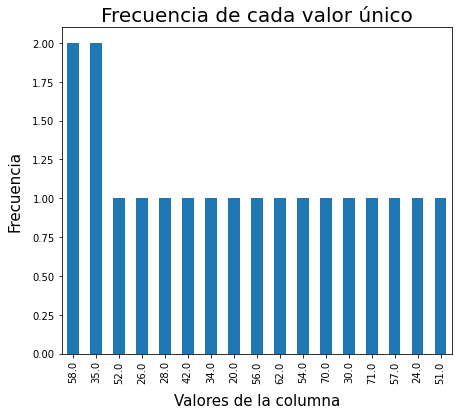

In [ ]:
data2.loc[np.arange(1, 20, dtype=int),'Edad'].value_counts().plot(kind='bar',figsize=(7, 6))
plt.xlabel("Valores de la columna", labelpad=10, fontsize=15)
plt.ylabel("Frecuencia", labelpad=10,fontsize=15)
plt.title("Frecuencia de cada valor único", y=1,fontsize=20);

In [ ]:
data2.loc[vaciosindex,'Edad'] = np.random.choice(count.index, size=len(data2.iloc[vaciosindex]),p=count.values)
data2.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,57.0
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,34.0
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,51.0
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,78.0
36,NaN,Simon Inc,514-13-5252,"57485 Jeremy Groves Apt. 550\nWest Loganport, ...","(-70.541115, 164.506427)",O-,"[http://bradley.org/, http://boyd.com/, http:/...",stokesjohn,Andrew Taylor,M,"9151 Kristin Meadows Suite 990\nPhilipton, NH ...",heather36@gmail.com,1972-11-24,63.0
37,NaN,"Gibson, Mann and Andrews",269-87-9130,"53296 Leslie Parkways Suite 290\nNew Troyport,...","(37.1500735, 25.393731)",A+,[http://www.howard.info/],rosalesbrian,Dana Arroyo,F,"31442 Luke Pines Apt. 358\nPort Randymouth, SC...",marshallnicole@gmail.com,1930-06-16,31.0
44,NaN,Russell-Smith,232-03-6160,"96081 Troy Passage\nKimburgh, KS 04993","(-61.409441, 147.762510)",B+,"[https://gomez.biz/, https://www.scott-taylor....",robin11,Benjamin Nguyen,M,"3712 Simpson Manor\nSouth Brian, SC 97443",adamortiz@yahoo.com,1929-06-23,46.0
50,Environmental health practitioner,"Smith, Riley and Martin",414-31-0431,"952 Stanley Ville Apt. 124\nThomasmouth, NJ 99630","(50.4110255, -173.866484)",O-,"[http://www.peterson.org/, https://walker.com/...",theresahinton,Stephanie Long,F,"595 Kristin Springs\nLake Robert, NH 89618",josephsimmons@yahoo.com,1976-02-13,31.0
74,Database administrator,"Torres, Brooks and Chandler",281-30-7765,"40765 Villanueva Course Apt. 600\nNorth Dale, ...","(-41.0892045, 92.096072)",O-,"[http://luna.com/, http://stone-lynch.com/, ht...",pwhitney,Breanna Neal,F,"570 David Path Suite 720\nWest Wandaborough, K...",xthomas@yahoo.com,1912-03-12,71.0
85,Airline pilot,Coleman Ltd,046-52-4270,"459 Gerald Freeway Suite 476\nMarisaland, GA 4...","(-84.3679565, -23.925109)",B+,"[https://brock.com/, https://www.wright.com/, ...",weavertracy,Martin Liu,M,"6911 Glover Squares Apt. 283\nChristopherbury,...",garnervirginia@yahoo.com,1908-04-30,54.0


In [ ]:
data.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
3,Psychotherapist,Lee-Rowe,430-17-2954,"751 Wu Trail Apt. 441\nLake Robert, AS 44684","(-41.4553845, -48.983690)",AB-,"[https://carter.com/, http://hall.org/, http:/...",julielarsen,Lisa Nelson,F,"PSC 6669, Box 0310\nAPO AE 51463",nknight@gmail.com,1927-01-28,NaN
9,"Administrator, education",Roberts Inc,506-04-9772,"0228 Kaiser Mountain\nJoannaside, PA 17309","(-28.6278615, 12.777384)",AB+,"[http://www.rich.com/, https://green-henry.com...",traci18,Natasha Moore,F,"8523 Wright Parkway\nMarcbury, OH 55911",abrown@hotmail.com,1998-08-28,NaN
29,"Engineer, biomedical",Mclean-Nguyen,774-91-1079,"1849 Samantha Crossroad Apt. 334\nDunnhaven, A...","(-35.710665, -179.436399)",A-,"[http://rodriguez.info/, https://cuevas.com/, ...",scottvelasquez,Christopher Vega,M,USNS Sloan\nFPO AA 17244,justin38@yahoo.com,2018-12-07,NaN
33,Further education lecturer,Moreno-Estes,773-74-7915,"7573 Evans Land Suite 977\nWilsonside, VA 57462","(62.0843095, 2.915793)",O+,"[http://www.osborne-juarez.com/, https://freem...",montgomerymichelle,Joseph Marshall,M,"9217 Meyer Fords\nPort William, MA 88688",veronica98@yahoo.com,1941-08-27,NaN
38,"Therapist, horticultural",Carey Group,285-22-7071,"586 Pollard Mills\nIanberg, SD 46154","(20.8763095, -42.380827)",AB-,"[http://mcgee-boyle.org/, https://www.edwards-...",kathleen27,Victoria Wilson,F,"4370 Harris Isle Apt. 773\nWardberg, SC 23507",cody19@gmail.com,2004-06-06,NaN
45,"Programmer, applications",Baker-Williams,134-21-1303,USNS Thomas\nFPO AA 75165,"(40.145425, 46.143503)",AB+,"[https://escobar-anderson.com/, http://www.har...",garrettrachel,Susan Valdez,F,"586 Shelton Tunnel\nLake Shannonstad, OR 58527",aaronbeck@hotmail.com,1957-06-30,NaN
61,"Presenter, broadcasting",Brooks Inc,372-99-9457,"1997 Torres Highway\nEast Briantown, IN 94987","(44.8078825, 40.873709)",A+,"[http://ferguson.net/, http://www.wilson.com/,...",frankhudson,Curtis Werner,M,"381 Martinez Loop Suite 275\nNew Curtisshire, ...",christina47@yahoo.com,1915-04-28,NaN
78,"Scientist, audiological",Young Inc,571-54-1534,"567 Tracy Rapids\nEast Cathy, TX 84278","(10.437230, -10.141052)",A-,"[http://hernandez.com/, https://mcknight.biz/,...",fritzjoshua,Glen House,M,Unit 5290 Box 8745\nDPO AP 74773,william13@yahoo.com,2002-09-30,NaN
95,NaN,Jones-Meadows,619-43-1886,"43867 Goodman Creek\nNew Markhaven, IA 60791","(-8.626412, -71.197763)",O-,[https://www.ramsey-stephens.com/],kelly07,Taylor Torres,F,"720 Lisa Pines Suite 692\nRyanmouth, PR 90731",shannonkent@gmail.com,2004-08-26,NaN
96,"Engineer, civil (contracting)",Jackson-Johnson,832-11-5656,046 Alexander Cliffs Suite 017\nNew Christophe...,"(-50.7176185, -170.412660)",A-,[http://may-dalton.info/],james48,Megan Acosta,F,"34024 Patel Points\nJamesfort, GU 60298",hhickman@gmail.com,1990-08-11,NaN


# 6- Imputando con interpolacion

In [ ]:
data2 = data.copy()
data2 = data2.interpolate()
data2.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,47.500000
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,31.000000
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,33.000000
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,55.000000
36,NaN,Simon Inc,514-13-5252,"57485 Jeremy Groves Apt. 550\nWest Loganport, ...","(-70.541115, 164.506427)",O-,"[http://bradley.org/, http://boyd.com/, http:/...",stokesjohn,Andrew Taylor,M,"9151 Kristin Meadows Suite 990\nPhilipton, NH ...",heather36@gmail.com,1972-11-24,42.333333
37,NaN,"Gibson, Mann and Andrews",269-87-9130,"53296 Leslie Parkways Suite 290\nNew Troyport,...","(37.1500735, 25.393731)",A+,[http://www.howard.info/],rosalesbrian,Dana Arroyo,F,"31442 Luke Pines Apt. 358\nPort Randymouth, SC...",marshallnicole@gmail.com,1930-06-16,54.666667
44,NaN,Russell-Smith,232-03-6160,"96081 Troy Passage\nKimburgh, KS 04993","(-61.409441, 147.762510)",B+,"[https://gomez.biz/, https://www.scott-taylor....",robin11,Benjamin Nguyen,M,"3712 Simpson Manor\nSouth Brian, SC 97443",adamortiz@yahoo.com,1929-06-23,39.000000
50,Environmental health practitioner,"Smith, Riley and Martin",414-31-0431,"952 Stanley Ville Apt. 124\nThomasmouth, NJ 99630","(50.4110255, -173.866484)",O-,"[http://www.peterson.org/, https://walker.com/...",theresahinton,Stephanie Long,F,"595 Kristin Springs\nLake Robert, NH 89618",josephsimmons@yahoo.com,1976-02-13,54.500000
74,Database administrator,"Torres, Brooks and Chandler",281-30-7765,"40765 Villanueva Course Apt. 600\nNorth Dale, ...","(-41.0892045, 92.096072)",O-,"[http://luna.com/, http://stone-lynch.com/, ht...",pwhitney,Breanna Neal,F,"570 David Path Suite 720\nWest Wandaborough, K...",xthomas@yahoo.com,1912-03-12,69.500000
85,Airline pilot,Coleman Ltd,046-52-4270,"459 Gerald Freeway Suite 476\nMarisaland, GA 4...","(-84.3679565, -23.925109)",B+,"[https://brock.com/, https://www.wright.com/, ...",weavertracy,Martin Liu,M,"6911 Glover Squares Apt. 283\nChristopherbury,...",garnervirginia@yahoo.com,1908-04-30,77.000000


In [ ]:
data2 = data.copy()
data2 = data2.interpolate(method="akima") #nearest, spline, piecewise_polynomial,cubicspline,etc...
data2.iloc[vaciosindex]


,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,44.643283
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,27.594066
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,31.879310
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,55.725953
36,NaN,Simon Inc,514-13-5252,"57485 Jeremy Groves Apt. 550\nWest Loganport, ...","(-70.541115, 164.506427)",O-,"[http://bradley.org/, http://boyd.com/, http:/...",stokesjohn,Andrew Taylor,M,"9151 Kristin Meadows Suite 990\nPhilipton, NH ...",heather36@gmail.com,1972-11-24,38.400322
37,NaN,"Gibson, Mann and Andrews",269-87-9130,"53296 Leslie Parkways Suite 290\nNew Troyport,...","(37.1500735, 25.393731)",A+,[http://www.howard.info/],rosalesbrian,Dana Arroyo,F,"31442 Luke Pines Apt. 358\nPort Randymouth, SC...",marshallnicole@gmail.com,1930-06-16,56.356200
44,NaN,Russell-Smith,232-03-6160,"96081 Troy Passage\nKimburgh, KS 04993","(-61.409441, 147.762510)",B+,"[https://gomez.biz/, https://www.scott-taylor....",robin11,Benjamin Nguyen,M,"3712 Simpson Manor\nSouth Brian, SC 97443",adamortiz@yahoo.com,1929-06-23,38.156048
50,Environmental health practitioner,"Smith, Riley and Martin",414-31-0431,"952 Stanley Ville Apt. 124\nThomasmouth, NJ 99630","(50.4110255, -173.866484)",O-,"[http://www.peterson.org/, https://walker.com/...",theresahinton,Stephanie Long,F,"595 Kristin Springs\nLake Robert, NH 89618",josephsimmons@yahoo.com,1976-02-13,55.193090
74,Database administrator,"Torres, Brooks and Chandler",281-30-7765,"40765 Villanueva Course Apt. 600\nNorth Dale, ...","(-41.0892045, 92.096072)",O-,"[http://luna.com/, http://stone-lynch.com/, ht...",pwhitney,Breanna Neal,F,"570 David Path Suite 720\nWest Wandaborough, K...",xthomas@yahoo.com,1912-03-12,69.415128
85,Airline pilot,Coleman Ltd,046-52-4270,"459 Gerald Freeway Suite 476\nMarisaland, GA 4...","(-84.3679565, -23.925109)",B+,"[https://brock.com/, https://www.wright.com/, ...",weavertracy,Martin Liu,M,"6911 Glover Squares Apt. 283\nChristopherbury,...",garnervirginia@yahoo.com,1908-04-30,77.390726


In [ ]:
data2 = data.copy()
data2 = data2.interpolate(method="polynomial",order=5)
data2.iloc[vaciosindex]


,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,68.088025
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,19.416772
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,36.943873
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,50.940307
36,NaN,Simon Inc,514-13-5252,"57485 Jeremy Groves Apt. 550\nWest Loganport, ...","(-70.541115, 164.506427)",O-,"[http://bradley.org/, http://boyd.com/, http:/...",stokesjohn,Andrew Taylor,M,"9151 Kristin Meadows Suite 990\nPhilipton, NH ...",heather36@gmail.com,1972-11-24,51.305128
37,NaN,"Gibson, Mann and Andrews",269-87-9130,"53296 Leslie Parkways Suite 290\nNew Troyport,...","(37.1500735, 25.393731)",A+,[http://www.howard.info/],rosalesbrian,Dana Arroyo,F,"31442 Luke Pines Apt. 358\nPort Randymouth, SC...",marshallnicole@gmail.com,1930-06-16,75.878691
44,NaN,Russell-Smith,232-03-6160,"96081 Troy Passage\nKimburgh, KS 04993","(-61.409441, 147.762510)",B+,"[https://gomez.biz/, https://www.scott-taylor....",robin11,Benjamin Nguyen,M,"3712 Simpson Manor\nSouth Brian, SC 97443",adamortiz@yahoo.com,1929-06-23,37.118658
50,Environmental health practitioner,"Smith, Riley and Martin",414-31-0431,"952 Stanley Ville Apt. 124\nThomasmouth, NJ 99630","(50.4110255, -173.866484)",O-,"[http://www.peterson.org/, https://walker.com/...",theresahinton,Stephanie Long,F,"595 Kristin Springs\nLake Robert, NH 89618",josephsimmons@yahoo.com,1976-02-13,35.142988
74,Database administrator,"Torres, Brooks and Chandler",281-30-7765,"40765 Villanueva Course Apt. 600\nNorth Dale, ...","(-41.0892045, 92.096072)",O-,"[http://luna.com/, http://stone-lynch.com/, ht...",pwhitney,Breanna Neal,F,"570 David Path Suite 720\nWest Wandaborough, K...",xthomas@yahoo.com,1912-03-12,44.865425
85,Airline pilot,Coleman Ltd,046-52-4270,"459 Gerald Freeway Suite 476\nMarisaland, GA 4...","(-84.3679565, -23.925109)",B+,"[https://brock.com/, https://www.wright.com/, ...",weavertracy,Martin Liu,M,"6911 Glover Squares Apt. 283\nChristopherbury,...",garnervirginia@yahoo.com,1908-04-30,76.358607


In [ ]:
data.iloc[vaciosindex]

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate,Edad
5,Theatre director,Miller-Roberts,759-38-1994,"9813 Mcbride Crossing\nPort Nicholas, CT 17418","(-6.761862, -24.050694)",AB-,"[https://www.ramsey.com/, http://mcguire.com/,...",lisagarcia,Melissa Glenn,F,"847 Johnathan Park\nStewarttown, FM 02031",solomoncarol@hotmail.com,1916-08-23,NaN
14,Dispensing optician,Mccarty-Pacheco,585-44-6676,"42474 Mark Crescent\nNorth Laura, MN 29855","(86.648751, 104.438836)",B+,"[http://miller.com/, http://www.cobb-perkins.n...",opayne,Crystal Lane,F,"983 Douglas Court\nNew Jenniferfurt, VA 22970",greenherbert@yahoo.com,1963-09-25,NaN
19,Personnel officer,Johnson-Dixon,264-58-3099,22543 Sanchez Dam Suite 425\nPort Brandonborou...,"(74.469544, 21.498865)",O-,"[https://little-thompson.info/, http://gonzale...",christophercastillo,Jeffrey Bush,M,"2613 Yates Flats Apt. 627\nGabrielaburgh, MN 9...",seanlindsey@gmail.com,1915-06-01,NaN
21,Hydrologist,"Cox, Krueger and Schneider",148-57-3424,"245 Kevin Glens\nDeborahbury, NV 16990","(31.160636, 103.689238)",O+,"[http://www.powell-calderon.com/, https://www....",michael45,Cody Flores,M,"2937 Patricia Springs\nLake Kristine, ND 85415",joanne86@gmail.com,1996-12-02,NaN
36,NaN,Simon Inc,514-13-5252,"57485 Jeremy Groves Apt. 550\nWest Loganport, ...","(-70.541115, 164.506427)",O-,"[http://bradley.org/, http://boyd.com/, http:/...",stokesjohn,Andrew Taylor,M,"9151 Kristin Meadows Suite 990\nPhilipton, NH ...",heather36@gmail.com,1972-11-24,NaN
37,NaN,"Gibson, Mann and Andrews",269-87-9130,"53296 Leslie Parkways Suite 290\nNew Troyport,...","(37.1500735, 25.393731)",A+,[http://www.howard.info/],rosalesbrian,Dana Arroyo,F,"31442 Luke Pines Apt. 358\nPort Randymouth, SC...",marshallnicole@gmail.com,1930-06-16,NaN
44,NaN,Russell-Smith,232-03-6160,"96081 Troy Passage\nKimburgh, KS 04993","(-61.409441, 147.762510)",B+,"[https://gomez.biz/, https://www.scott-taylor....",robin11,Benjamin Nguyen,M,"3712 Simpson Manor\nSouth Brian, SC 97443",adamortiz@yahoo.com,1929-06-23,NaN
50,Environmental health practitioner,"Smith, Riley and Martin",414-31-0431,"952 Stanley Ville Apt. 124\nThomasmouth, NJ 99630","(50.4110255, -173.866484)",O-,"[http://www.peterson.org/, https://walker.com/...",theresahinton,Stephanie Long,F,"595 Kristin Springs\nLake Robert, NH 89618",josephsimmons@yahoo.com,1976-02-13,NaN
74,Database administrator,"Torres, Brooks and Chandler",281-30-7765,"40765 Villanueva Course Apt. 600\nNorth Dale, ...","(-41.0892045, 92.096072)",O-,"[http://luna.com/, http://stone-lynch.com/, ht...",pwhitney,Breanna Neal,F,"570 David Path Suite 720\nWest Wandaborough, K...",xthomas@yahoo.com,1912-03-12,NaN
85,Airline pilot,Coleman Ltd,046-52-4270,"459 Gerald Freeway Suite 476\nMarisaland, GA 4...","(-84.3679565, -23.925109)",B+,"[https://brock.com/, https://www.wright.com/, ...",weavertracy,Martin Liu,M,"6911 Glover Squares Apt. 283\nChristopherbury,...",garnervirginia@yahoo.com,1908-04-30,NaN
